# Experiment 7 : Grow of stables attractors fields in Aleatory CBN with diferents number of edges

This experiment explore the growth of local networks in CBN with Aleatory topology. Its important see what happened with the Linear CBN with more edges

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
# df = pd.read_csv("outputs/exp7_data_3_9_10/data.csv")
df = pd.read_csv("outputs/exp7_data_3_6_100/data.csv")
# df = pd.read_csv("outputs/exp7_data_3_6_10/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## Basics Estatistics

In [83]:
# Select the required columns and create a new DataFrame
df_resume = df[['n_local_networks', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
df_resume.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,4.727273,29.022727,172.969545,932.215000
std,1.094939,18.742079,325.157661,10172.866589
min,3.000000,6.000000,0.000000,0.000000
25%,4.000000,16.000000,24.000000,1.000000
50%,5.000000,24.000000,68.500000,4.000000
75%,6.000000,36.000000,186.000000,64.000000
max,6.000000,168.000000,4800.000000,207504.000000


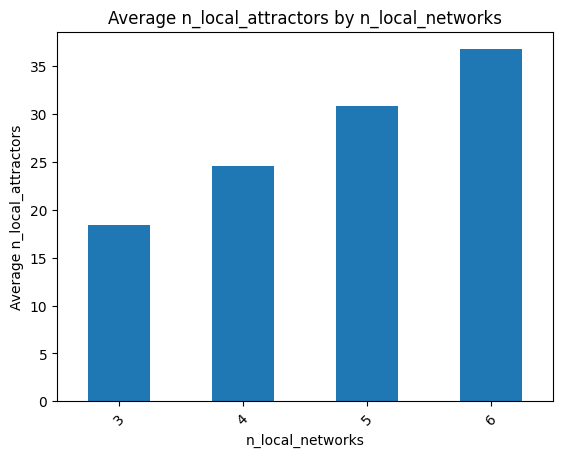

In [84]:
# Group by 'n_local_networks' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_local_networks')['n_local_attractors'].mean()

# Create the histogram
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_local_attractors by n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_local_attractors')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

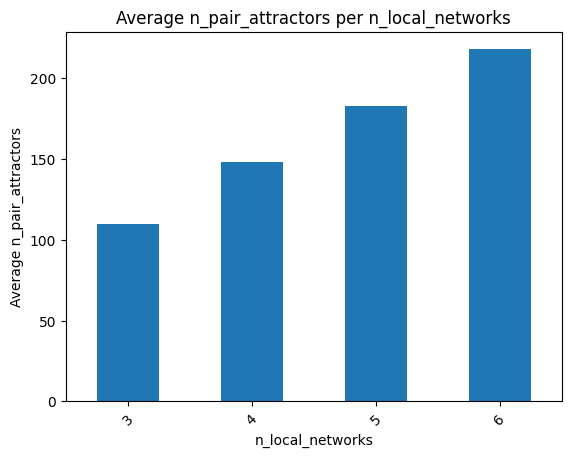

In [85]:
# Group by 'n_local_networks' and calculate the mean of 'n_pair_attractors'
grouped_data = df.groupby('n_local_networks')['n_pair_attractors'].mean()

# Create the bar plot with different colors for each column
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_pair_attractors per n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_pair_attractors')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()
                

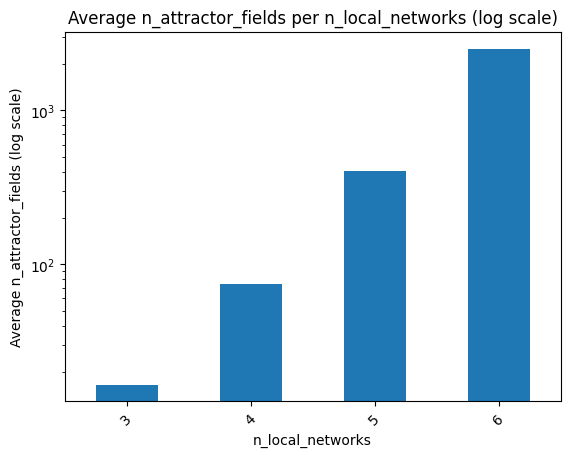

In [86]:
# Group by 'n_local_networks' and calculate the mean of 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Create the bar plot with logarithmic scale on the y-axis and different colors
grouped_data.plot(kind='bar', logy=True)

# Customize the plot
plt.title('Average n_attractor_fields per n_local_networks (log scale)')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_attractor_fields (log scale)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

## Advanced Statistics

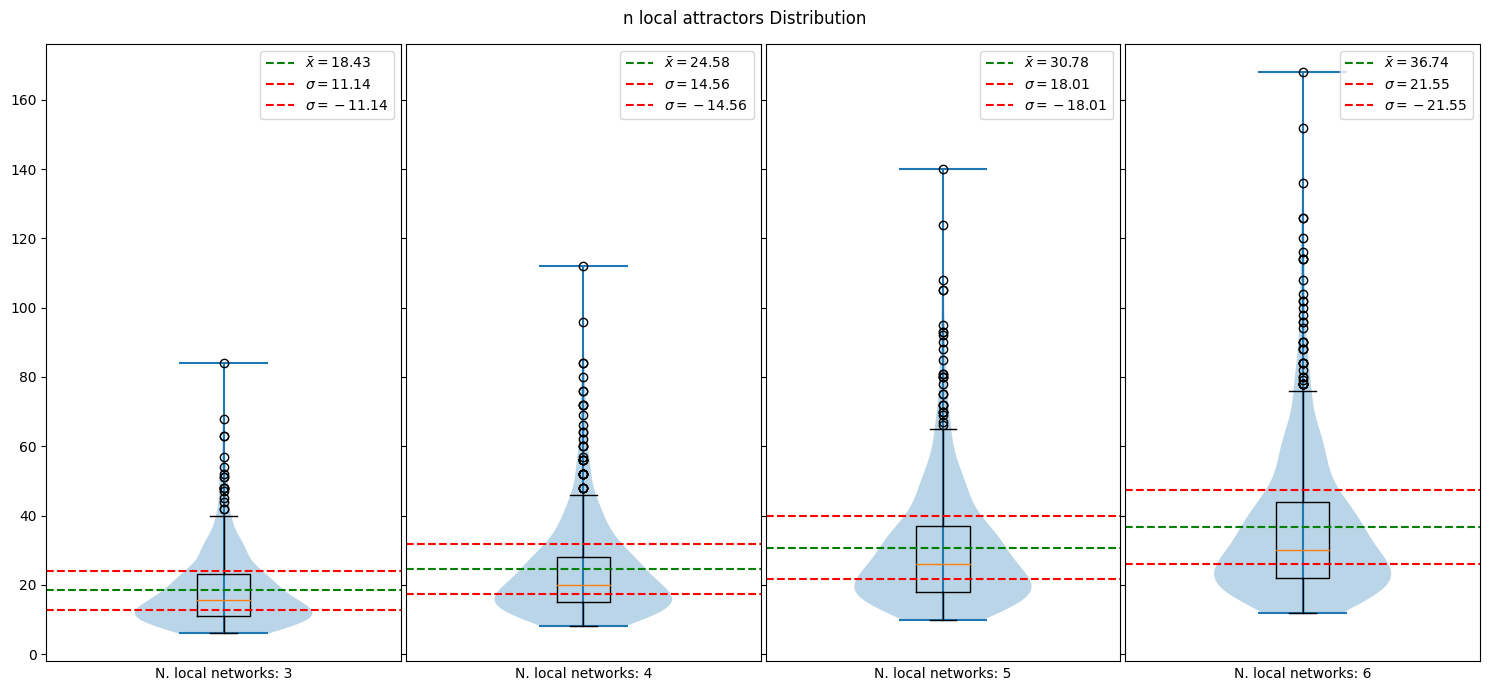

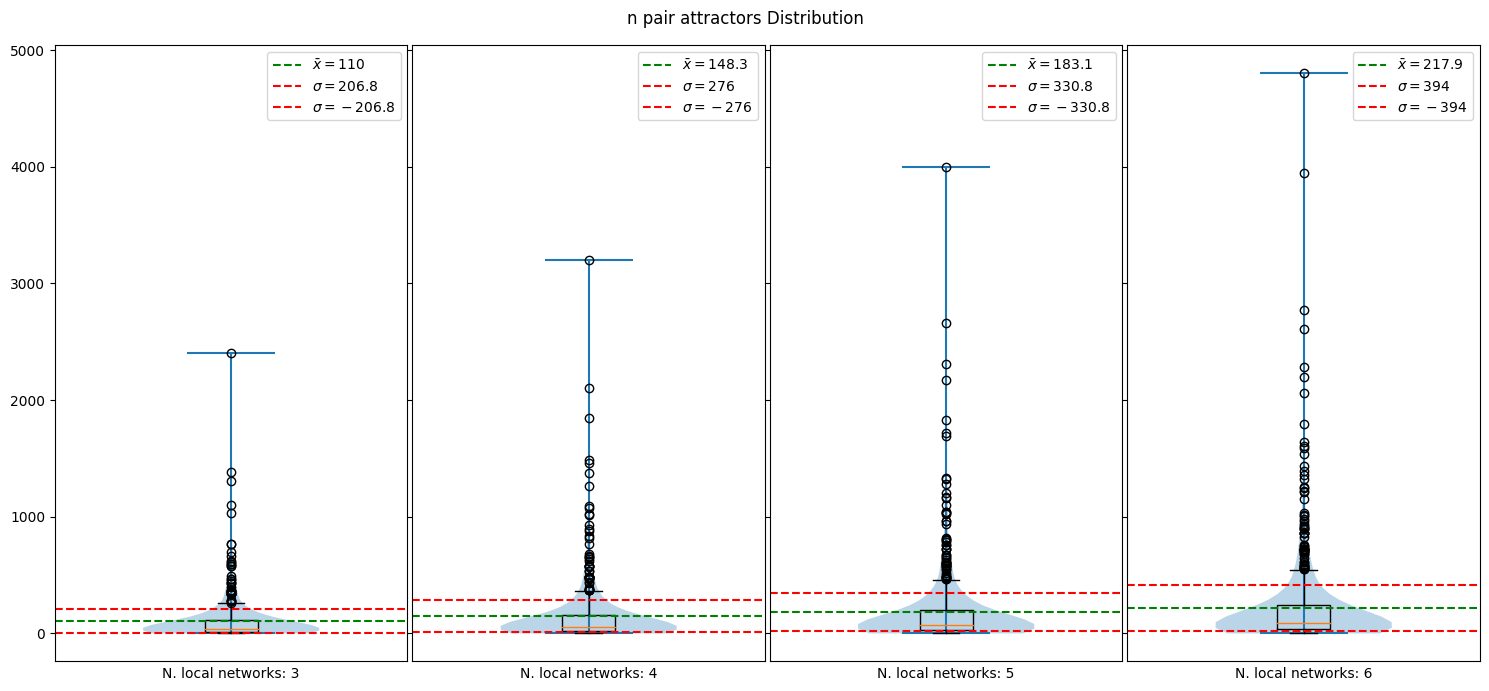

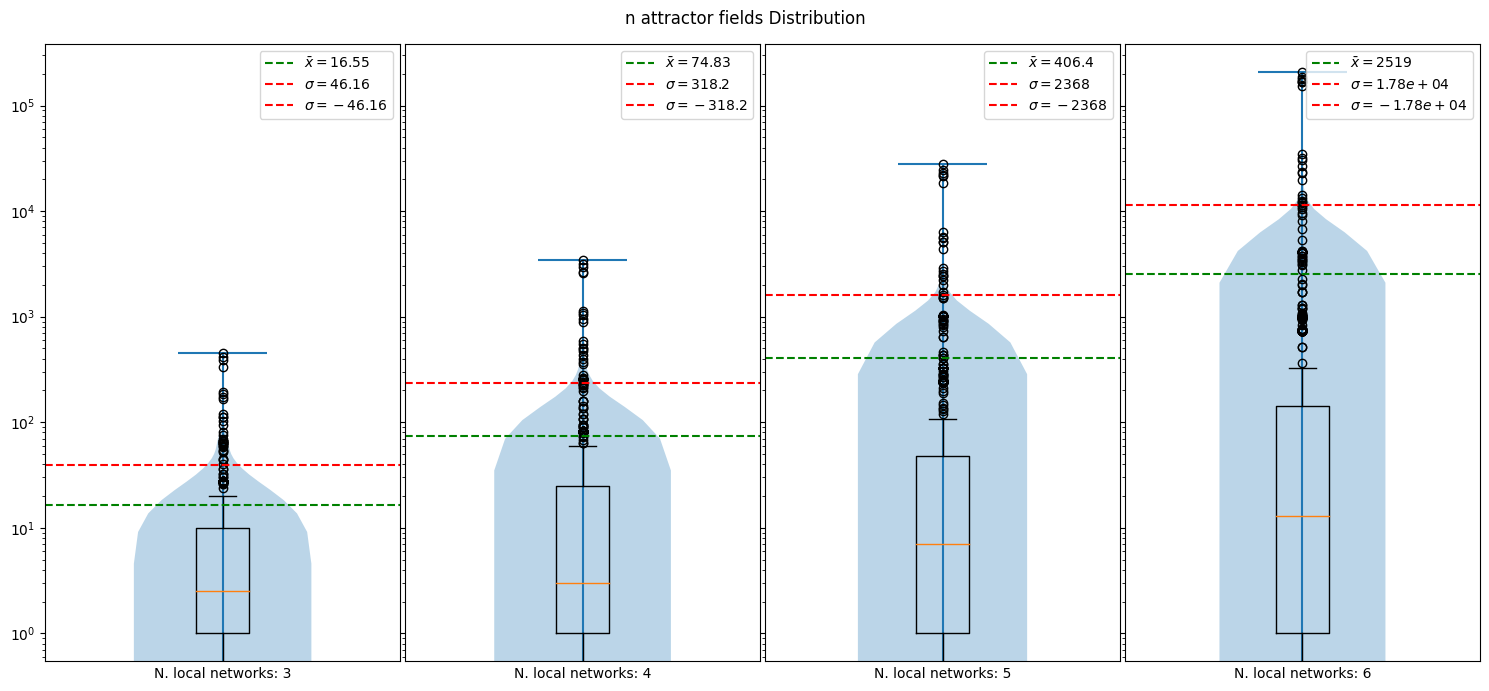

In [87]:
# Obtain the last three unique values of n_local_networks
n_local_networks_unique = df_resume['n_local_networks'].unique()
# n_local_networks_last_three = sorted(n_local_networks_unique)[-3:]
n_local_networks_last_three = sorted(n_local_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

for attribute in attributes:
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_resume[df_resume['n_local_networks'] == n_networks][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev/2, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev/2, color='r', ls='--', label=fr'$\sigma=-{std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Apply log scale only on the last attribute
            axs[i].set_yscale('log')

    fig.suptitle(f'{attribute.replace("_", " ")} Distribution')
    fig.tight_layout(w_pad=0)

plt.show()

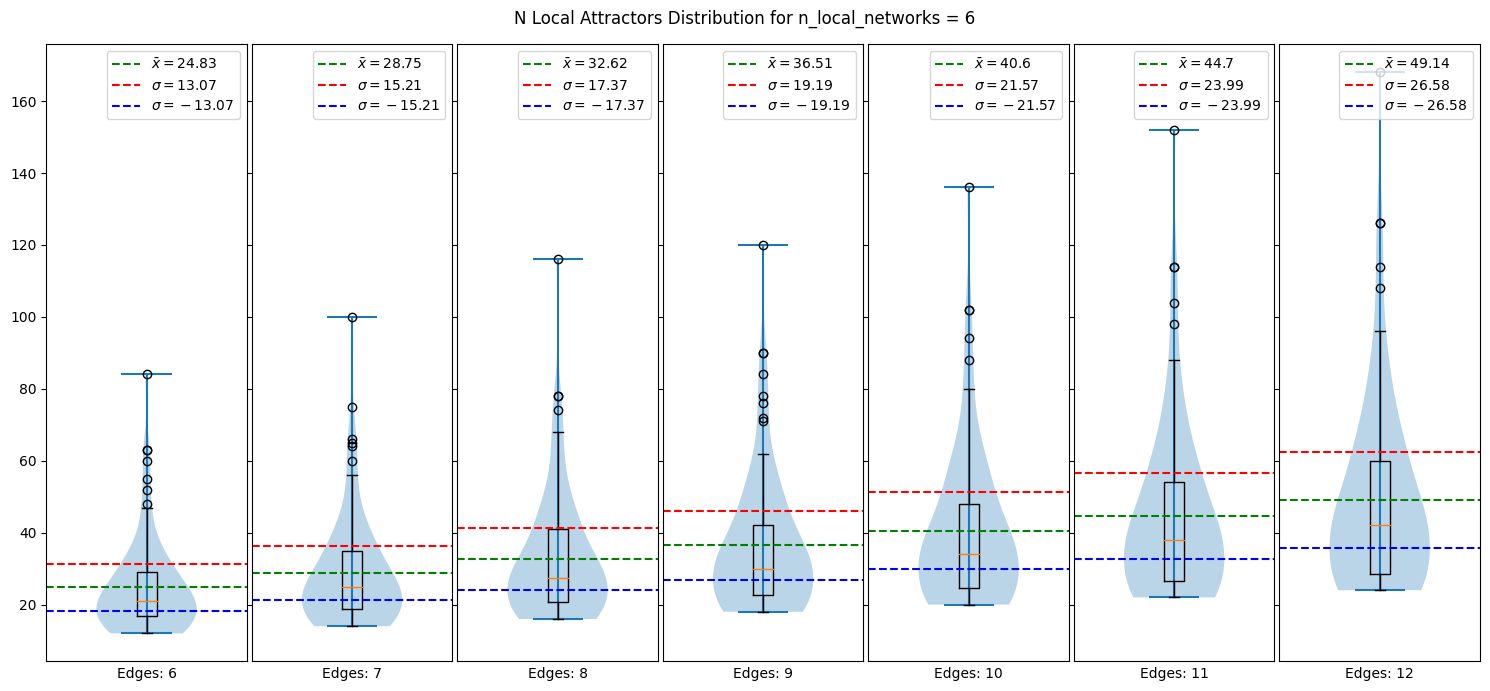

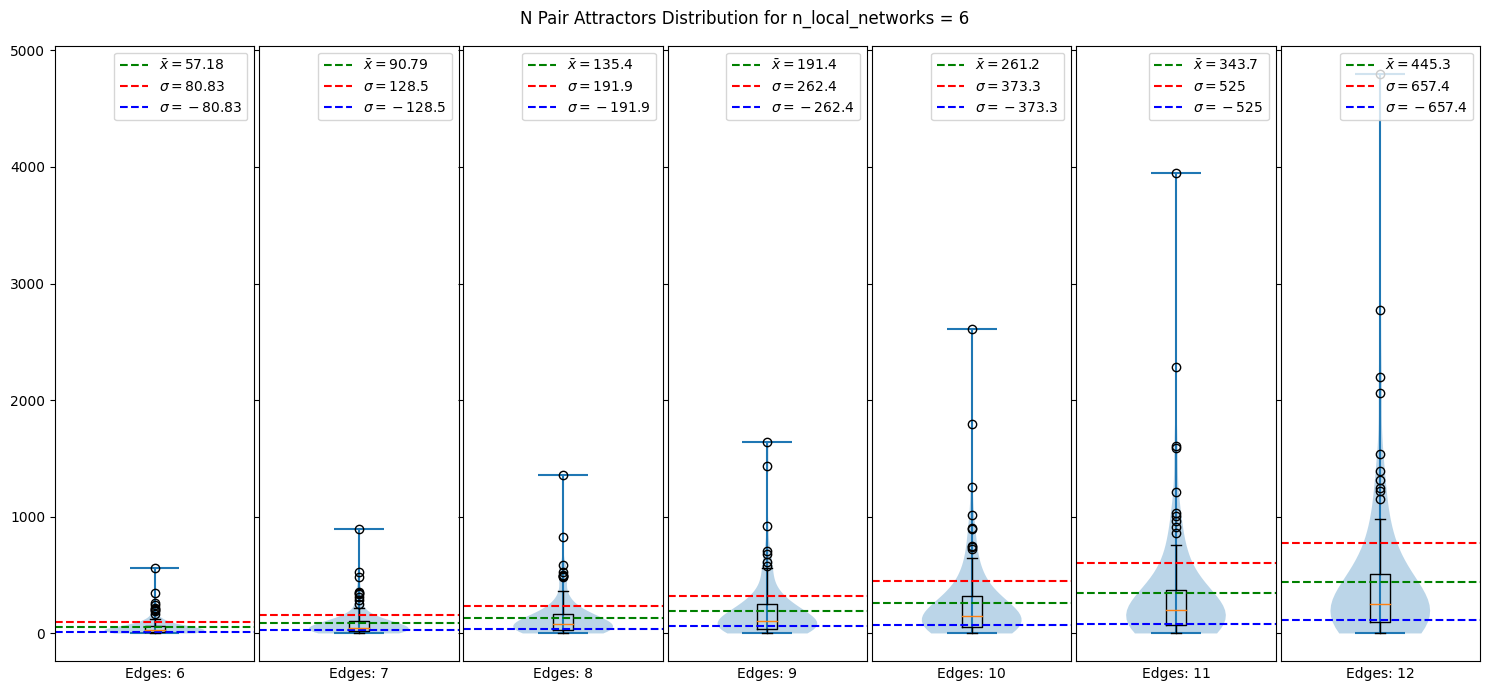

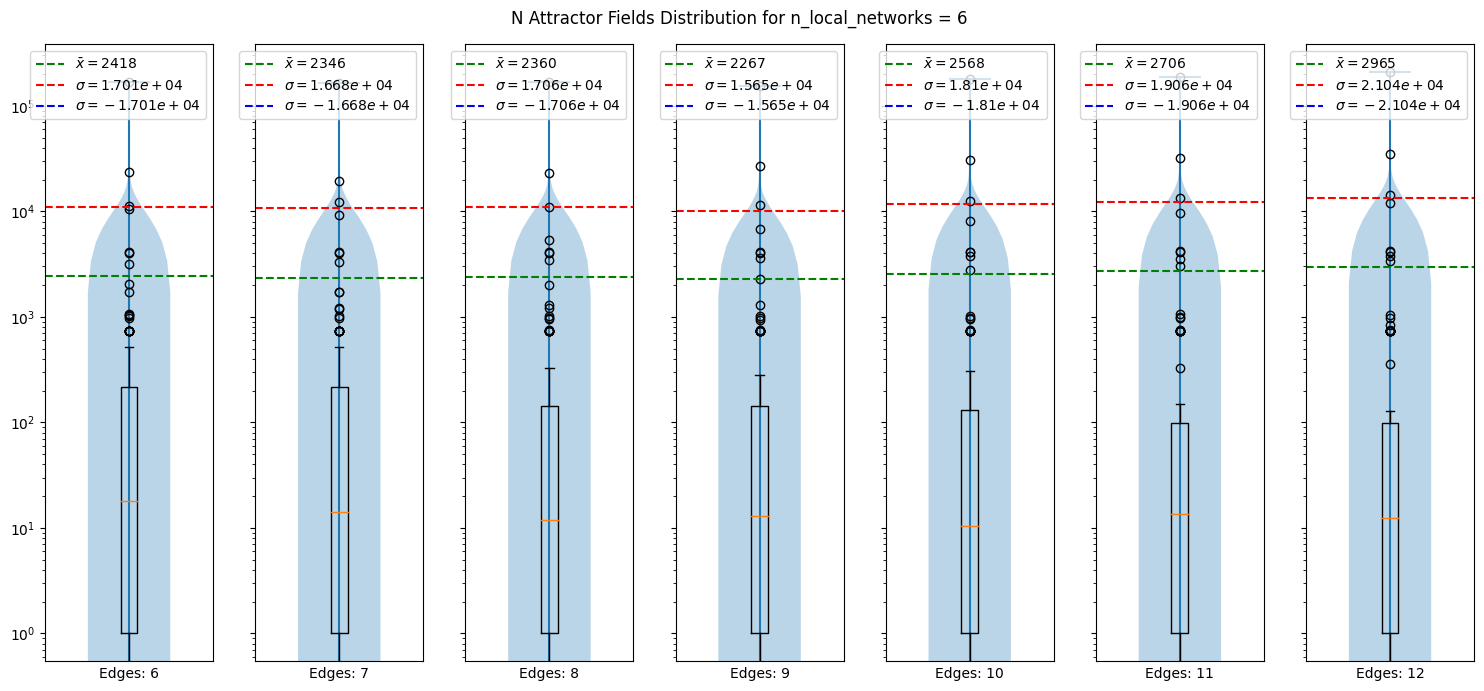

In [88]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para n_local_networks igual a 4
filtered_df = df[(df['n_local_networks'] == 6)]

# Atributos para los cuales se generarán los gráficos
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']

# Obtener los valores únicos de n_edges
edges_unique = sorted(filtered_df['n_edges'].unique())

for attribute in attributes:
    fig, axs = plt.subplots(1, len(edges_unique), sharey=True, figsize=(15, 7))

    for i, n_edges in enumerate(edges_unique):
        data = filtered_df[filtered_df['n_edges'] == n_edges][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data, widths=0.1)
        axs[i].set_xlabel(f'Edges: {n_edges}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev/2, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev/2, color='b', ls='--', label=fr'$\sigma=-{std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Aplicar escala logarítmica solo en el último atributo
            axs[i].set_yscale('log')

    # Reemplazar guiones bajos por espacios y formatear el título
    title = f'{attribute.replace("_", " ").title()} Distribution for n_local_networks = 6'
    fig.suptitle(title)
    fig.tight_layout(w_pad=0)

plt.show()

In [89]:
# Filtra las filas donde 'n_edges' es igual a 12 y 'n_local_networks' es igual a 6
filtered_df = df[(df['n_edges'] == 12) & (df['n_local_networks'] == 6)]
# Selecciona las columnas específicas que deseas mantener
filtered_df = filtered_df[['n_local_networks', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
filtered_df.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,100.0,100.00000,100.000000,100.000000
mean,6.0,49.14000,445.320000,2965.030000
std,0.0,26.58359,657.379691,21038.893443
min,6.0,24.00000,0.000000,0.000000
25%,6.0,28.50000,96.000000,1.000000
50%,6.0,42.00000,252.000000,12.500000
75%,6.0,60.00000,507.000000,98.500000
max,6.0,168.00000,4800.000000,207504.000000


In [90]:
# Filtra las filas donde 'n_edges' es igual a 12 y 'n_local_networks' es igual a 6
filtered_df = df[(df['n_edges'] == 11) & (df['n_local_networks'] == 6)]
# Selecciona las columnas específicas que deseas mantener
filtered_df = filtered_df[['n_local_networks', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
filtered_df.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,100.0,100.000000,100.000000,100.00000
mean,6.0,44.700000,343.680000,2706.46000
std,0.0,23.993897,525.017227,19063.29723
min,6.0,22.000000,0.000000,0.00000
25%,6.0,26.500000,71.000000,1.00000
50%,6.0,38.000000,197.500000,13.50000
75%,6.0,54.000000,372.500000,98.50000
max,6.0,152.000000,3944.000000,187984.00000


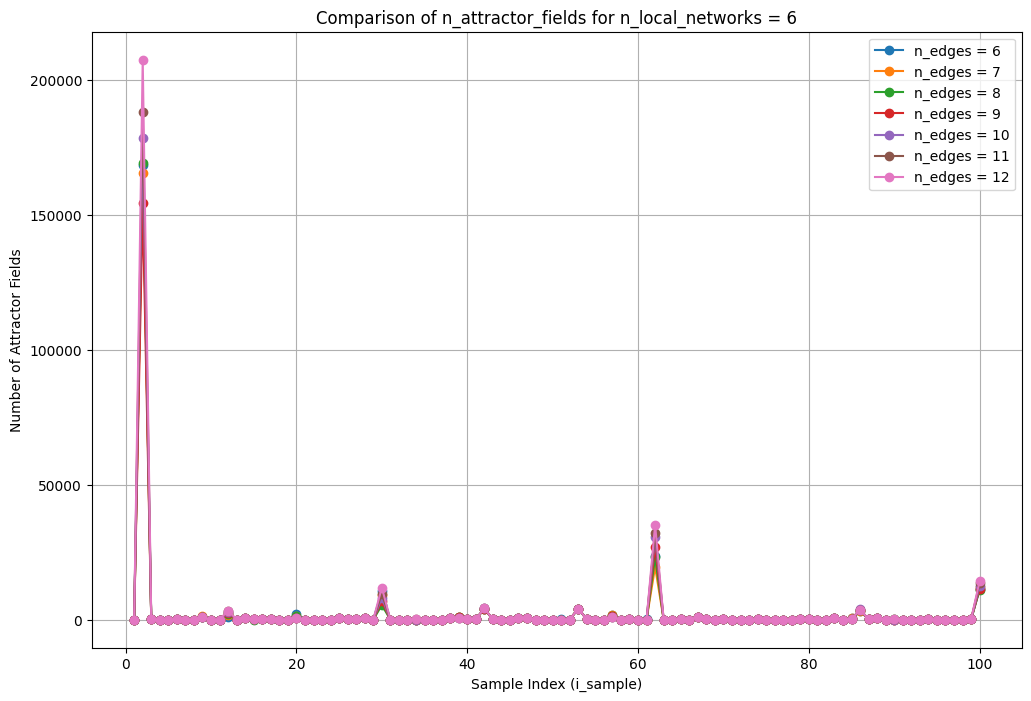

In [91]:
import matplotlib.pyplot as plt

# Filtra las filas donde 'n_local_networks' es igual a 6
filtered_df = df[df['n_local_networks'] == 6]

# Obtiene los valores únicos de 'n_edges'
unique_edges = filtered_df['n_edges'].unique()

# Genera el gráfico
plt.figure(figsize=(12, 8))

# Itera sobre cada valor único de 'n_edges' para graficar una línea
for n_edge in unique_edges:
    edge_df = filtered_df[filtered_df['n_edges'] == n_edge]
    plt.plot(edge_df['i_sample'], edge_df['n_attractor_fields'], marker='o', linestyle='-', label=f'n_edges = {n_edge}')

# Añade títulos y etiquetas
plt.title('Comparison of n_attractor_fields for n_local_networks = 6')
plt.xlabel('Sample Index (i_sample)')
plt.ylabel('Number of Attractor Fields')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()


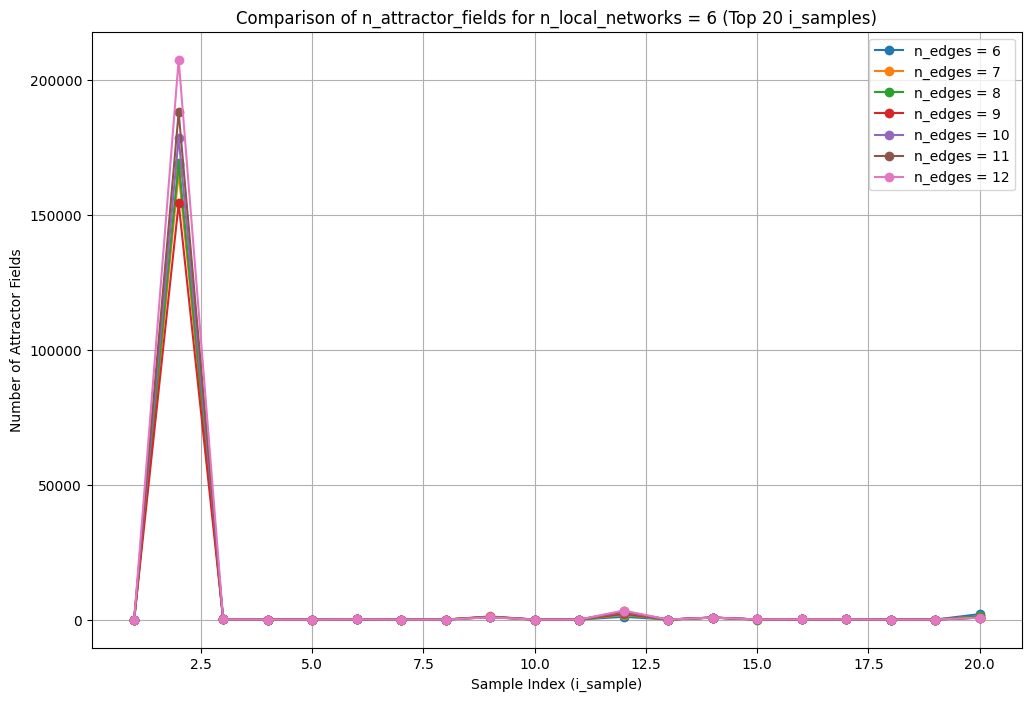

In [92]:
import matplotlib.pyplot as plt

# Filtra las filas donde 'n_local_networks' es igual a 6
filtered_df = df[df['n_local_networks'] == 6]

# Obtiene los valores únicos de 'n_edges'
unique_edges = filtered_df['n_edges'].unique()

# Selecciona los primeros 20 valores de i_sample después del filtrado
top_samples = filtered_df['i_sample'].unique()[:20]

# Genera el gráfico
plt.figure(figsize=(12, 8))

# Itera sobre cada valor único de 'n_edges' para graficar una línea
for n_edge in unique_edges:
    edge_df = filtered_df[filtered_df['n_edges'] == n_edge]
    top_edge_df = edge_df[edge_df['i_sample'].isin(top_samples)]
    plt.plot(top_edge_df['i_sample'], top_edge_df['n_attractor_fields'], marker='o', linestyle='-', label=f'n_edges = {n_edge}')

# Añade títulos y etiquetas
plt.title('Comparison of n_attractor_fields for n_local_networks = 6 (Top 20 i_samples)')
plt.xlabel('Sample Index (i_sample)')
plt.ylabel('Number of Attractor Fields')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()


# Top 20

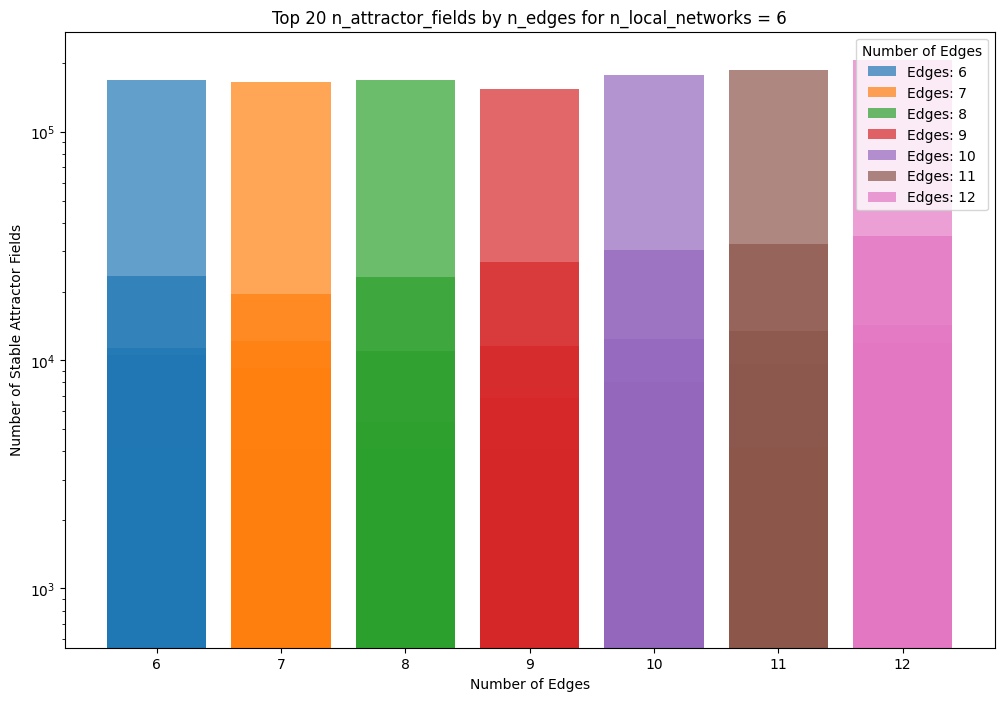

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para obtener solo los registros donde n_local_networks = 6
filtered_df = df[df['n_local_networks'] == 6]

# Group by 'n_edges' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_edges = filtered_df.groupby('n_edges')['n_attractor_fields'].nlargest(20).reset_index(level=0)

# Create the bar chart
plt.figure(figsize=(12, 8))

# Iterate over each group and draw the bars only for the top 20 values
for edge, values in top_20_by_edges.groupby('n_edges'):
    plt.bar([f'{edge}'] * len(values), values['n_attractor_fields'], label=f'Edges: {edge}', alpha=0.7)

# Customize the plot
plt.title('Top 20 n_attractor_fields by n_edges for n_local_networks = 6')
plt.xlabel('Number of Edges')
plt.ylabel('Number of Stable Attractor Fields')
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Edges')

# Show the plot
plt.show()


## Dispersion Graph

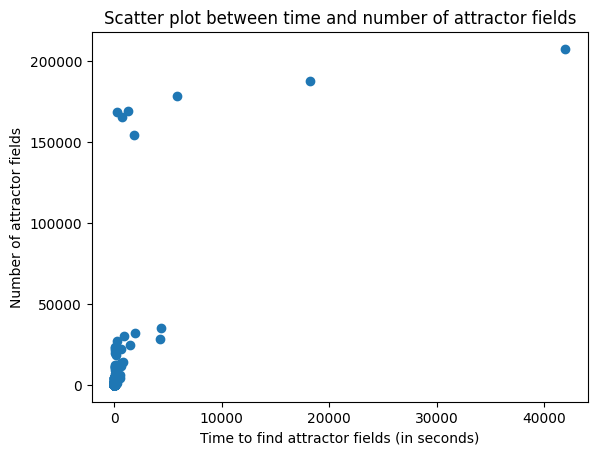

In [94]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

## Power-Law Distribution

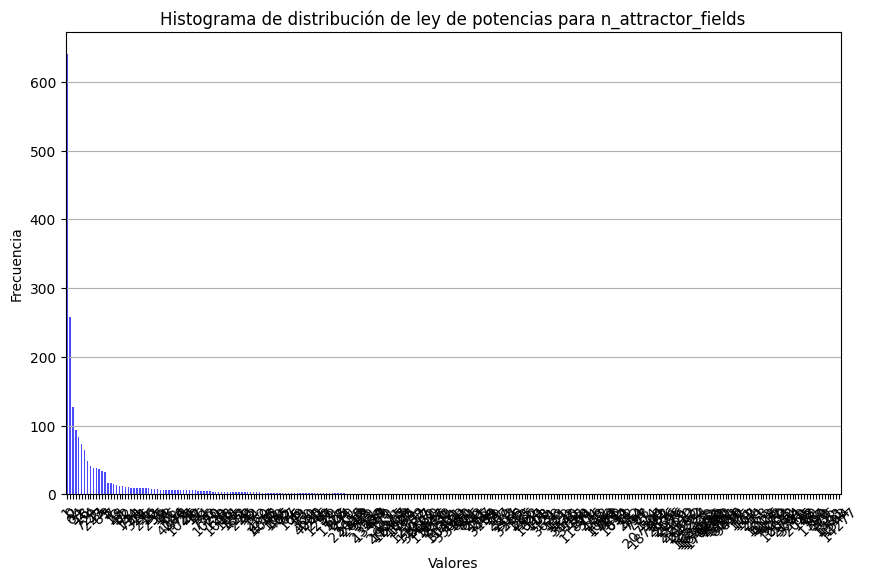

In [95]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()